In [1]:

import jax
from jax import jit
import jax.numpy as jnp
import numpy as np
import os
import copy
import optax
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from jax_sph.io_state import read_h5
import warnings

# Disable UserWarnings
warnings.filterwarnings("ignore")

In [2]:
#Load data
optim_init_a = read_h5('optim_a_init.h5')
optim_final_a = read_h5('optim_a_final.h5')
target_init_a = read_h5('target_traj/traj_000_a.h5')
target_final_a = read_h5('target_traj/traj_100_a.h5')

2024-02-10 00:55:29.396413: W external/xla/xla/service/gpu/nvptx_compiler.cc:698] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


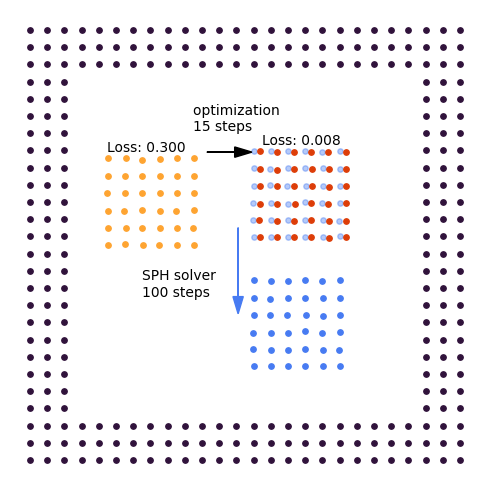

done


In [50]:
def ploting_A(optim_final_state, optim_init_state, target_state_final, target_state_init, mask):
    # Add two plots side by side
    fig = plt.figure(figsize=(5, 5))
    turbo_map = cm.get_cmap('turbo')
    global_size = 15
    plt.scatter(target_state_init["r"][mask][:,0], target_state_init["r"][mask][:,1], label='target 0', s=global_size, c=turbo_map(0.15), alpha=0.4)
    plt.scatter(target_state_final["r"][mask][:,0], target_state_final["r"][mask][:,1], label='target 100', s=global_size, c=turbo_map(0.15))
    plt.scatter(optim_init_state["r"][mask][:,0], optim_init_state["r"][mask][:,1], label='init', s=global_size, c=turbo_map(0.7))
    plt.scatter(optim_final_state["r"][mask][:,0],optim_final_state["r"][mask][:,1], label='updated', s=global_size, c=turbo_map(0.85))
    plt.scatter(optim_init_state["r"][~mask][:,0], optim_init_state["r"][~mask][:,1], label='wall', s=global_size, color=turbo_map(0))
    #plt.legend(loc='upper right')
    plt.arrow(0.54, 0.92, 0.08, 0.0, head_width=0.03, head_length=0.05, fc='k', ec='k')
    plt.text(0.5, 0.98, 'optimization \n15 steps', fontsize=10)
    plt.text(0.25, 0.92, 'Loss: 0.300', fontsize=10) 
    plt.text(0.7, 0.94, 'Loss: 0.008', fontsize=10)
    
    plt.arrow(0.63, 0.7, 0.0, -0.2, head_width=0.03, head_length=0.05, fc=turbo_map(0.15), ec=turbo_map(0.15))
    plt.text(0.35, 0.5, 'SPH solver \n100 steps', fontsize=10)
    
    plt.axis('equal')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    fig.savefig('optim_A.png')
    print('done')
    
mask = target_final_a["tag"] == 0

ploting_A(optim_final_a, optim_init_a, target_final_a, target_init_a, mask)

In [4]:
optim_init_b = read_h5('optim_b_init.h5')
optim_final_b = read_h5('optim_b_final.h5')
target_init_b = read_h5('target_traj/traj_000_b.h5')
target_final_b = read_h5('target_traj/traj_100_b.h5')

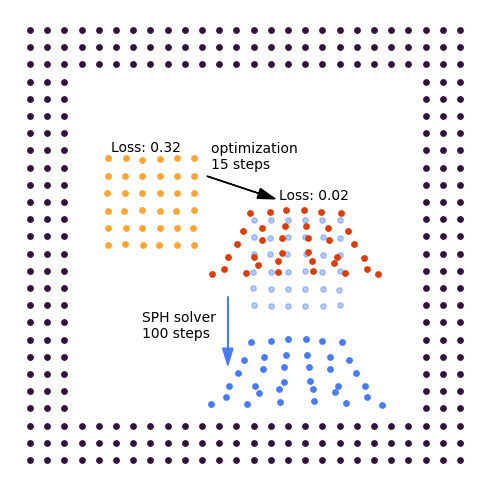

done


In [5]:
def ploting_B(optim_final_state, optim_init_state, target_state_final, target_state_init, mask):
    # Add two plots side by side
    fig = plt.figure(figsize=(5, 5))
    turbo_map = cm.get_cmap('turbo')
    global_size = 15
    plt.scatter(target_state_init["r"][mask][:,0], target_state_init["r"][mask][:,1], label='target 0', s=global_size, c=turbo_map(0.15), alpha=0.4)
    plt.scatter(target_state_final["r"][mask][:,0], target_state_final["r"][mask][:,1], label='target 100', s=global_size, c=turbo_map(0.15))
    plt.scatter(optim_init_state["r"][mask][:,0], optim_init_state["r"][mask][:,1], label='init', s=global_size, c=turbo_map(0.7))
    plt.scatter(optim_final_state["r"][mask][:,0],optim_final_state["r"][mask][:,1], label='updated', s=global_size, c=turbo_map(0.85))
    plt.scatter(optim_init_state["r"][~mask][:,0], optim_init_state["r"][~mask][:,1], label='wall', s=global_size, color=turbo_map(0))
    #plt.legend(loc='upper right')
    plt.arrow(0.54, 0.85, 0.15, -0.05, head_width=0.03, head_length=0.05, fc='k', ec='k')
    plt.text(0.55, 0.87, 'optimization \n15 steps', fontsize=10)
    plt.text(0.26, 0.92, 'Loss: 0.32', fontsize=10)
    plt.arrow(0.6, 0.5, 0.0, -0.15, head_width=0.03, head_length=0.05, fc=turbo_map(0.15), ec=turbo_map(0.15))
    plt.text(0.35, 0.38, 'SPH solver \n100 steps', fontsize=10)
    plt.text(0.75, 0.78, 'Loss: 0.02', fontsize=10)
    plt.axis('equal')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    fig.savefig('optim_B.png')
    print('done')
    
mask = target_final_b["tag"] == 0

ploting_B(optim_final_b, optim_init_b, target_final_b, target_init_b, mask)